<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/main/first_project_PCA_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# separate dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



## the transformation of data from a text file to a CSV


In [3]:
data_1year=pd.read_csv('csv_result-1year.csv')
data_2year=pd.read_csv('csv_result-2year .csv')
data_3year=pd.read_csv('csv_result-3year.csv')
data_4year=pd.read_csv('csv_result-4year.csv')
data_5year=pd.read_csv('csv_result-5year.csv')
all_data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], ignore_index=True)
all_data

<ipython-input-3-9e51fdb42de8>:2: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2year=pd.read_csv('csv_result-2year .csv')
<ipython-input-3-9e51fdb42de8>:3: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3year=pd.read_csv('csv_result-3year.csv')
<ipython-input-3-9e51fdb42de8>:4: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_4year=pd.read_csv('csv_result-4year.csv')


,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5906,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,5907,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,5908,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
43403,5909,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


In [4]:
formulas = ["id",
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]


In [5]:
all_data.columns=formulas
all_data

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5906,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,5907,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,5908,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
43403,5909,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


## Data Cleaning


###Handling Missing Values


In [6]:
all_data_rest = all_data.astype(str)
all_data_rest.replace("?", float('nan'), inplace=True)


In [7]:
datafra=all_data_rest.copy()

In [8]:
datafra = datafra.drop("id", axis=1)


In [9]:
# Replace NaN with the mean of each column
data_filled_with_mean = datafra.fillna(datafra.mean())


<ipython-input-9-77c51d7b5c79>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_with_mean = datafra.fillna(datafra.mean())


In [10]:
data_filled_with_zero = datafra.fillna(0)

In [11]:
data_filled_with_mean

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
43403,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,0.093224,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


In [12]:
missing_values_count=data_filled_with_mean.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:]

net profit / total assets                                                                                              8
total liabilities / total assets                                                                                       8
working capital / total assets                                                                                         8
current assets / short-term liabilities                                                                              134
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365     89
                                                                                                                    ... 
sales / receivables                                                                                                  102
(short-term liabilities * 365) / sales                                                                               127
sales / short-term liabilities  

In [13]:
total_cells = np.product(data_filled_with_mean.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.4646309801245867


In [14]:
class_counts = data_filled_with_mean['bankruptcy status'].value_counts()

# Display the counts
print(class_counts)


0    41314
1     2091
Name: bankruptcy status, dtype: int64


In [15]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd

In [16]:

# Load your data and preprocess it as needed
X = data_filled_with_mean.drop('bankruptcy status', axis=1)
y = data_filled_with_mean['bankruptcy status']

# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_imputed, y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)

# Create a new DataFrame with the balanced data
balanced_data = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.Series(y_resampled, name='bankruptcy status')
], axis=1)

# Display the class distribution
class_counts = balanced_data['bankruptcy status'].value_counts()
print(class_counts)

0    2091
1    2091
Name: bankruptcy status, dtype: int64


In [17]:
balanced_data

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.098275,0.689090,0.096268,1.15190,-96.658,0.00000,0.099358,0.451180,2.06410,0.310910,...,0.062746,0.316090,0.95230,0.178410,3.4428,17.1720,112.040,3.2576,7.64180,0
1,-0.257840,0.099026,0.523050,6.28190,68.253,0.00000,-0.257840,9.098400,1.93310,0.900970,...,0.070721,-0.286170,1.12980,0.000000,8.5123,8.7629,18.697,19.5210,5.11510,0
2,-0.142850,1.010100,-0.204310,0.74337,-89.541,-0.59144,-0.142850,-0.010004,1.54150,-0.010105,...,-0.026785,14.137000,1.09260,-21.175000,9.4260,3.6732,188.510,1.9362,3.77660,0
3,-0.081316,0.311580,0.396870,6.42580,51.022,-0.81435,-0.081316,2.209400,1.95070,0.688420,...,-0.021926,-0.118120,1.04030,0.346360,17.5960,8.7252,13.687,26.6680,3.68060,0
4,0.014115,0.094405,0.585740,7.20450,45.846,0.98852,0.014115,9.592600,1.87540,0.905590,...,0.004746,0.015587,0.99264,0.000000,5.1806,16.3590,18.374,19.8660,5.86340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,0.012898,0.706210,0.038857,1.17220,-18.907,0.00000,0.013981,0.416000,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
4178,-0.578050,0.967020,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.403340,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
4179,-0.179050,1.255300,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.260180,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
4180,-0.108860,0.743940,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.125310,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


<Axes: >

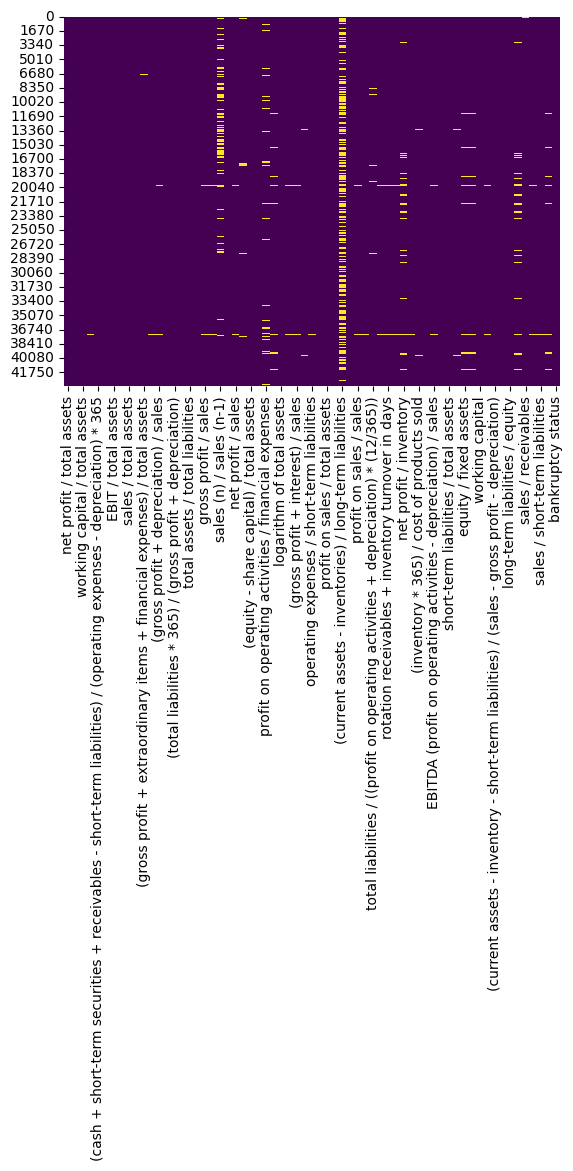

In [18]:
sns.heatmap(data_filled_with_mean.isnull(),cbar=False,cmap='viridis')

In [19]:
formula= [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]

In [20]:
for col in formula:
    balanced_data[col] = pd.to_numeric(balanced_data[col])
    balanced_data[col].fillna(0, inplace=True)
balanced_data

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.098275,0.689090,0.096268,1.15190,-96.658,0.00000,0.099358,0.451180,2.06410,0.310910,...,0.062746,0.316090,0.95230,0.178410,3.4428,17.1720,112.040,3.2576,7.64180,0
1,-0.257840,0.099026,0.523050,6.28190,68.253,0.00000,-0.257840,9.098400,1.93310,0.900970,...,0.070721,-0.286170,1.12980,0.000000,8.5123,8.7629,18.697,19.5210,5.11510,0
2,-0.142850,1.010100,-0.204310,0.74337,-89.541,-0.59144,-0.142850,-0.010004,1.54150,-0.010105,...,-0.026785,14.137000,1.09260,-21.175000,9.4260,3.6732,188.510,1.9362,3.77660,0
3,-0.081316,0.311580,0.396870,6.42580,51.022,-0.81435,-0.081316,2.209400,1.95070,0.688420,...,-0.021926,-0.118120,1.04030,0.346360,17.5960,8.7252,13.687,26.6680,3.68060,0
4,0.014115,0.094405,0.585740,7.20450,45.846,0.98852,0.014115,9.592600,1.87540,0.905590,...,0.004746,0.015587,0.99264,0.000000,5.1806,16.3590,18.374,19.8660,5.86340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,0.012898,0.706210,0.038857,1.17220,-18.907,0.00000,0.013981,0.416000,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
4178,-0.578050,0.967020,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.403340,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
4179,-0.179050,1.255300,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.260180,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
4180,-0.108860,0.743940,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.125310,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [21]:
for col in formula:
    balanced_data [col]=pd.to_numeric(balanced_data [col])
    balanced_data [col].fillna(balanced_data [col].mean(), inplace=True)
balanced_data

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.098275,0.689090,0.096268,1.15190,-96.658,0.00000,0.099358,0.451180,2.06410,0.310910,...,0.062746,0.316090,0.95230,0.178410,3.4428,17.1720,112.040,3.2576,7.64180,0
1,-0.257840,0.099026,0.523050,6.28190,68.253,0.00000,-0.257840,9.098400,1.93310,0.900970,...,0.070721,-0.286170,1.12980,0.000000,8.5123,8.7629,18.697,19.5210,5.11510,0
2,-0.142850,1.010100,-0.204310,0.74337,-89.541,-0.59144,-0.142850,-0.010004,1.54150,-0.010105,...,-0.026785,14.137000,1.09260,-21.175000,9.4260,3.6732,188.510,1.9362,3.77660,0
3,-0.081316,0.311580,0.396870,6.42580,51.022,-0.81435,-0.081316,2.209400,1.95070,0.688420,...,-0.021926,-0.118120,1.04030,0.346360,17.5960,8.7252,13.687,26.6680,3.68060,0
4,0.014115,0.094405,0.585740,7.20450,45.846,0.98852,0.014115,9.592600,1.87540,0.905590,...,0.004746,0.015587,0.99264,0.000000,5.1806,16.3590,18.374,19.8660,5.86340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,0.012898,0.706210,0.038857,1.17220,-18.907,0.00000,0.013981,0.416000,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
4178,-0.578050,0.967020,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.403340,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
4179,-0.179050,1.255300,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.260180,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
4180,-0.108860,0.743940,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.125310,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


#Scaling and  Normalization


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire DataFrame
data_scaled = scaler.fit_transform(balanced_data)

# Convert the numpy array back to a DataFrame with the original columns
data_scaled = pd.DataFrame(data_scaled, columns=balanced_data.columns)
data_scaled.head()


,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.030987,-0.025925,0.029879,-0.018363,0.018451,0.040319,0.029601,-0.024931,0.086268,0.019747,...,0.018347,0.038268,-0.032605,-0.030148,-0.068549,0.089673,-0.035470,-0.128303,-0.032052,-1.0
1,-0.017992,-0.073825,0.064645,-0.012155,0.027844,0.040319,-0.019523,-0.015050,0.040646,0.064990,...,0.018416,0.010672,-0.016163,-0.046318,-0.065527,-0.087632,-0.040285,0.269752,-0.033264,-1.0
2,-0.002177,0.000134,0.005395,-0.018857,0.018856,-0.000445,-0.003709,-0.025458,-0.095731,-0.004866,...,0.017580,0.671562,-0.019609,-1.965406,-0.064982,-0.194947,-0.031525,-0.160645,-0.033907,-1.0
3,0.006287,-0.056570,0.054366,-0.011981,0.026863,-0.015808,0.004753,-0.022921,0.046775,0.048693,...,0.017622,0.018372,-0.024453,-0.014927,-0.060111,-0.088427,-0.040543,0.444678,-0.033953,-1.0
4,0.019412,-0.074200,0.069751,-0.011039,0.026568,0.108450,0.017878,-0.014485,0.020552,0.065344,...,0.017851,0.024499,-0.028868,-0.046318,-0.067513,0.072531,-0.040301,0.278196,-0.032905,-1.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
data_scaled = scaler.fit_transform(balanced_data )
# data_scaled is now a numpy array with scaled values

# Convert the numpy array back to a DataFrame with the original columns
data_scaled = pd.DataFrame(data_scaled, columns=balanced_data .columns)
data_scaled.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy status
0,0.957919,0.001433,0.997322,0.000029,0.913228,0.934644,0.957921,0.000046,0.049206,0.643064,...,0.999789,0.893838,0.001430,0.404251,0.000038,0.010628,0.000325,0.003141,0.077225,0.0
1,0.957184,0.000206,0.998208,0.000125,0.913368,0.934644,0.957184,0.000208,0.048047,0.643854,...,0.999790,0.893403,0.001696,0.403971,0.000094,0.005423,0.000238,0.013782,0.077207,0.0
2,0.957421,0.002100,0.996697,0.000021,0.913234,0.933557,0.957421,0.000037,0.044581,0.642634,...,0.999777,0.903828,0.001640,0.370685,0.000104,0.002273,0.000396,0.002277,0.077197,0.0
3,0.957548,0.000648,0.997946,0.000128,0.913353,0.933147,0.957548,0.000079,0.048203,0.643570,...,0.999778,0.893524,0.001562,0.404515,0.000195,0.005400,0.000233,0.018459,0.077197,0.0
4,0.957745,0.000196,0.998339,0.000142,0.913349,0.936461,0.957745,0.000217,0.047536,0.643860,...,0.999781,0.893621,0.001491,0.403971,0.000057,0.010124,0.000237,0.014008,0.077212,0.0


In [25]:
data_scaled =data_scaled .astype(float)

#PCA


In [26]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [27]:
X = data_scaled .drop('bankruptcy status', axis=1)
y = data_scaled['bankruptcy status']


In [28]:
pca = PCA(n_components=None)

In [29]:
pca.fit(X)

PCA()

In [30]:

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Choose the number of components that explain at least 95% of the variance
desired_variance = 0.90
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

# Fit PCA again with the chosen number of components
pca = PCA(n_components=num_components)
print(num_components)

16


with method standarscaler we choose 20 of the components that explain at least 90% of the variance //with method MinMaxscaler we choose 16 of the components that explain at least 90% of the varianc

In [31]:
X_pca=pca.fit_transform(X)

In [32]:
X.shape

(4182, 64)

In [33]:
X_pca.shape

(4182, 16)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")

Accuracy of Logistic Regression model: 0.55


method standarscaler accuracy:0.67//
method MinMaxscaler accuracy:0.55


In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes model: {accuracy:.2f}")

Accuracy of Gaussian Naive Bayes model: 0.53


method standarscaler accuracy:0.54//method MinMaxscaler accuracy:0.53

In [39]:
logreg = LogisticRegression(penalty='l2', C=1.0, random_state=42)
logreg.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Regularized Logistic Regression model: {accuracy:.2f}")

Accuracy of Regularized Logistic Regression model: 0.55


method standarscaler accuracy:0.67//method MinMaxscaler accuracy:0.55

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy:.2f}")

Accuracy of Random Forest model: 0.68


method standarscaler accuracy:0.75//method MinMaxscaler accuracy:0.69

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


Accuracy: 0.5896414342629482


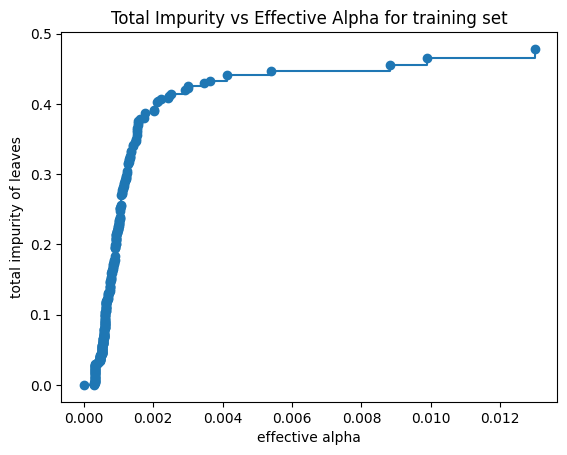

In [43]:
# Initialize a Decision Tree classifier
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
# Train the Decision Tree model
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter
clf = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, random_state=42)

# Re-fit the tree
clf.fit(X_train, y_train)


# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

method standarscaler accuracy:0.6677//method MinMaxscaler accuracy:0.60

In [44]:
 !pip install cleanlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.5/285.5 kB 4.5 MB/s eta 0:00:00


In [45]:
from cleanlab.filter import find_label_issues
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict

In [46]:
from xgboost import XGBClassifier
y_train_fixed = np.where(y_train == -1, 0, y_train)

In [47]:
model = XGBClassifier(tree_method="hist", enable_categorical=True)

model.fit(X_train, y_train_fixed)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost classifier: {accuracy:.2f}")

Accuracy of XGBoost classifier: 0.68


method standarscaler accuracy:0.40//method MinMaxscaler accuracy:0.67

In [48]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Accuracy: 0.6867145065779878


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define a range of 'k' values to test
k_values = range(1, 21)

# Initialize lists to store mean accuracy scores and classification reports for each 'k'
mean_accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation for each 'k' value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 10-fold cross-validation (you can adjust the number of folds)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=10)

    # Compute mean accuracy for this 'k' value
    mean_accuracy = accuracy_score(y_train, y_pred)
    mean_accuracy_scores.append(mean_accuracy)

    # Compute classification report for this 'k' value
    class_report = classification_report(y_train, y_pred)
    classification_reports.append(class_report)

# Find the 'k' value with the highest mean accuracy
best_k = k_values[np.argmax(mean_accuracy_scores)]
best_accuracy = max(mean_accuracy_scores)

# Display the best 'k' value, best accuracy, and the corresponding classification report
print(f"Best 'k' value: {best_k}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print("Classification Report for the Best 'k' Value:")
print(classification_reports[np.argmax(mean_accuracy_scores)])


Best 'k' value: 15
Best Accuracy: 0.6317
Classification Report for the Best 'k' Value:
              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64      1441
         1.0       0.65      0.61      0.63      1486

    accuracy                           0.63      2927
   macro avg       0.63      0.63      0.63      2927
weighted avg       0.63      0.63      0.63      2927



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [52]:
model.fit(X_train, y_train)  # X_train contains your feature data, y_train contains target labels

from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already trained a classification model and made predictions
y_true = y_test  # True labels from your test dataset
y_pred = model.predict(X_test)
# For classification
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# For regression
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Generate a classification report
report = classification_report(y_true, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67       650
         1.0       0.64      0.74      0.69       605

    accuracy                           0.68      1255
   macro avg       0.68      0.68      0.68      1255
weighted avg       0.68      0.68      0.68      1255



In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.49      0.53       650
         1.0       0.53      0.61      0.56       605

    accuracy                           0.55      1255
   macro avg       0.55      0.55      0.55      1255
weighted avg       0.55      0.55      0.54      1255



In [55]:
from sklearn.svm import SVC
model = SVC(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')
# or
# model = NuSVC(kernel='linear')  # For Nu-SVC

model.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.55       650
         1.0       0.52      0.53      0.52       605

    accuracy                           0.53      1255
   macro avg       0.53      0.53      0.53      1255
weighted avg       0.53      0.53      0.53      1255



In [57]:

from sklearn.linear_model import LogisticRegression

In [58]:
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")

Accuracy of Logistic Regression model: 0.55
